# Analysis of RTO data

In [1]:
from nbimports import *

In [2]:
import processing
processing = reload(processing)

In [3]:
# filename = "../data/user/data_04052022_143527.csv"
# filename = "../data/user/data_04052022_170752.csv"
# filename = "../data/user/data_05052022_182742.csv"
filename = "../data/user/data_18052022_112228.csv"

## all strokes

In [4]:
data = pd.read_csv(filename, index_col=0)
data.columns = ['source', 'data']

In [5]:
def format_data(df):
    new_rows = []
    for i, row in df.iterrows():
        row = eval(row['data'])
        new_rows.append(row)
    data = pd.DataFrame(data=new_rows)
    return data

In [6]:
format_data(select(data, source='/data')).columns

Index(['sample_key', 'timestamp0', 'timestamp', 'stroke_id', 'segment_id', 'x',
       'y', 'p', 'x_', 'y_', 'p_', 'x0', 'y0', 'p0', 'x1', 'y1', 's', 'angle',
       'dangle'],
      dtype='object')

In [7]:
data_df = utils.format_from_df(data)

In [8]:
data_df.head()

,sample_key,timestamp0,timestamp,stroke_id,segment_id,x,y,p,x_,y_,p_,x0,y0,p0,x1,y1,s,angle,dangle,timestamp0_norm
0,12540_0,12540,0,1,0,0.501302,0.503723,0.025795,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000
1,12557_10,12557,10,1,0,0.501302,0.503723,0.025027,0.000000,0.000000,-0.000769,0.000000e+00,0.000000e+00,-2.617769e-07,0.0,0.0,0.0,0.0,0.0,0.001506
2,12570_20,12570,20,1,0,0.501397,0.504216,0.024633,0.000095,0.000493,-0.001163,3.231316e-08,1.678770e-07,-2.903580e-06,0.0,0.0,0.0,0.0,0.0,0.002658
3,12570_30,12570,30,1,0,0.501713,0.505859,0.025114,0.000411,0.002136,-0.000682,4.495655e-07,2.335633e-06,-1.544613e-05,0.0,0.0,0.0,0.0,0.0,0.002658
4,12586_40,12586,40,1,0,0.502227,0.507633,0.024687,0.000925,0.003910,-0.001108,3.066234e-06,1.562477e-05,-5.310239e-05,0.0,0.0,0.0,0.0,0.0,0.004075


<AxesSubplot:>

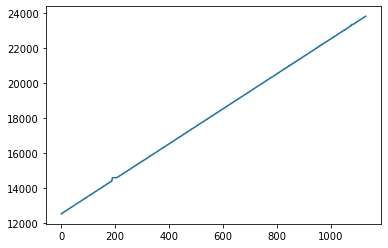

In [9]:
# data['timestamp'].plot()
data_df['timestamp0'].plot()

In [10]:
import seaborn as sns

<AxesSubplot:xlabel='x', ylabel='y'>

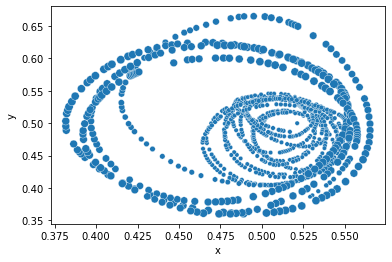

In [11]:
sns.scatterplot(data=data_df, x='x', y='y', size='p', hue='stroke_id', palette='tab10', legend=False)

In [12]:
data.shape

(1159, 2)

## features

<AxesSubplot:>

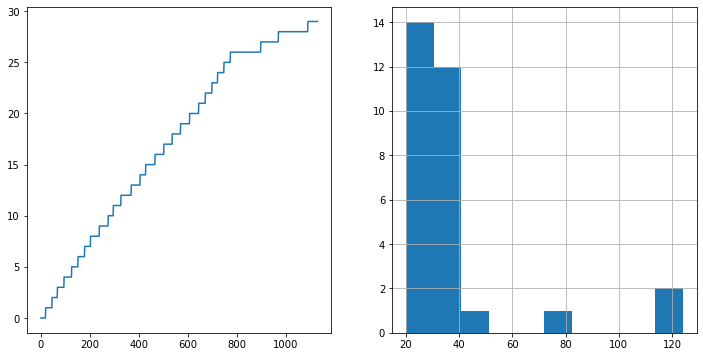

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
data_df['segment_id'].plot(ax=ax[0])
data_df.groupby('segment_id').size().hist(ax=ax[1])

The scale of the different features should be comparable for the DTW to take them into account equally. Alternatively, we could compute a Mahalanobis distance from a small batch of data.

<AxesSubplot:>

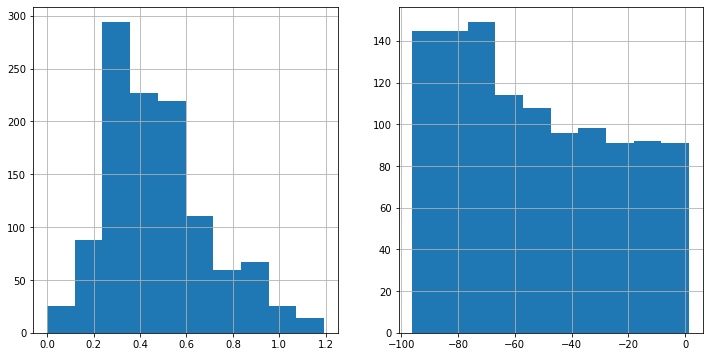

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
data_df['s'].hist(ax=ax[0])
data_df['angle'].hist(ax=ax[1])

## one stroke

In [15]:
set(data_df['stroke_id'])

{1}

In [18]:
stroke_i = select(data_df, stroke_id=1)

In [19]:
stroke_i.head()

,sample_key,timestamp0,timestamp,stroke_id,segment_id,x,y,p,x_,y_,p_,x0,y0,p0,x1,y1,s,angle,dangle,timestamp0_norm
0,12540_0,12540,0,1,0,0.501302,0.503723,0.025795,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000
1,12557_10,12557,10,1,0,0.501302,0.503723,0.025027,0.000000,0.000000,-0.000769,0.000000e+00,0.000000e+00,-2.617769e-07,0.0,0.0,0.0,0.0,0.0,0.001506
2,12570_20,12570,20,1,0,0.501397,0.504216,0.024633,0.000095,0.000493,-0.001163,3.231316e-08,1.678770e-07,-2.903580e-06,0.0,0.0,0.0,0.0,0.0,0.002658
3,12570_30,12570,30,1,0,0.501713,0.505859,0.025114,0.000411,0.002136,-0.000682,4.495655e-07,2.335633e-06,-1.544613e-05,0.0,0.0,0.0,0.0,0.0,0.002658
4,12586_40,12586,40,1,0,0.502227,0.507633,0.024687,0.000925,0.003910,-0.001108,3.066234e-06,1.562477e-05,-5.310239e-05,0.0,0.0,0.0,0.0,0.0,0.004075


<AxesSubplot:xlabel='timestamp', ylabel='s'>

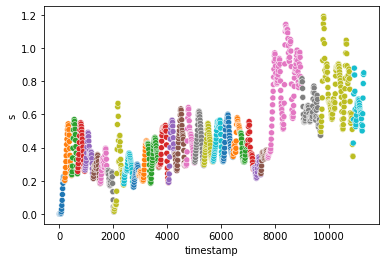

In [21]:
sns.scatterplot(data=stroke_i, x='timestamp', y='s', hue='segment_id', palette='tab10', legend=False)

<AxesSubplot:xlabel='timestamp', ylabel='angle'>

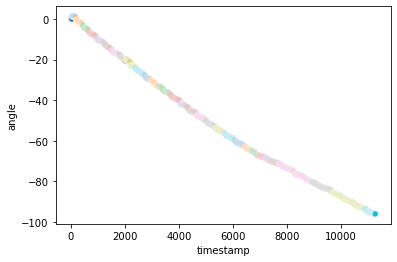

In [22]:
sns.scatterplot(data=stroke_i, x='timestamp', y='angle', hue='segment_id', palette='tab10', legend=False)

<AxesSubplot:xlabel='timestamp', ylabel='dangle'>

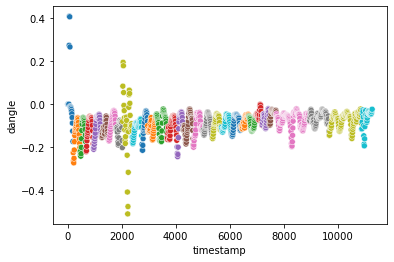

In [24]:
sns.scatterplot(data=stroke_i, x='timestamp', y='dangle', hue='segment_id', palette='tab10', legend=False)

In [133]:
stroke_i.columns

Index(['key', 't0', 't0_norm', 'ts', 'stroke_id', 'segment_id', 'x', 'y', 'p',
       'x_', 'y_', 'p_', 'x0', 'y0', 'p0', 'x1', 'y1', 's', 'angle'],
      dtype='object')

<AxesSubplot:>

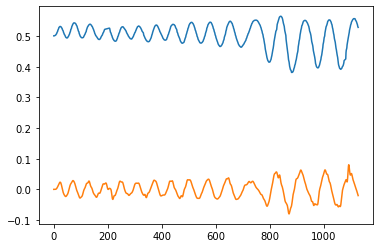

In [25]:
stroke_i['x'].plot()
(10*stroke_i['x1']).plot()

<AxesSubplot:>

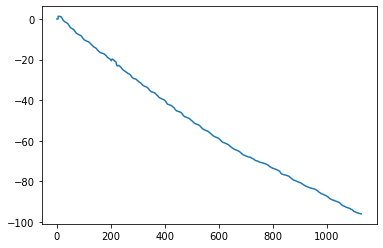

In [26]:
stroke_i['angle'].plot()

<AxesSubplot:>

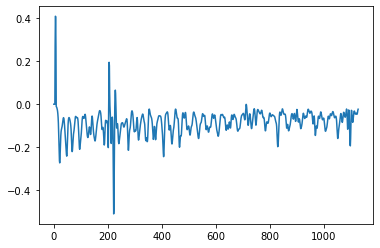

In [28]:
stroke_i['dangle'].plot()

In [90]:
list(set(stroke_i['segment_id']))[:3]

[0, 1, 2]

In [91]:
mask = stroke_i['ts'] < 100

In [92]:
stroke_i.loc[mask, ['p']] = -1

In [93]:
stroke_i.head()

,key,t0,t0_norm,ts,stroke_id,segment_id,x,y,p,x_,y_,p_,x0,y0,p0,x1,y1,s,angle
0,690029_0,690029,0.000000,0,22,0,0.396347,0.478729,-1.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
1,690046_10,690046,0.000891,10,22,0,0.396347,0.478729,-1.0,0.000000,0.000000,0.000836,0.000000e+00,0.000000e+00,2.845402e-07,0.0,0.0,0.0,0.0
2,690101_20,690101,0.003772,20,22,0,0.396353,0.478789,-1.0,0.000006,0.000060,0.001566,1.909414e-09,2.040686e-08,3.259055e-06,0.0,0.0,0.0,0.0
3,690101_30,690101,0.003772,30,22,0,0.396372,0.478989,-1.0,0.000024,0.000260,0.002052,2.656524e-08,2.839160e-07,1.822215e-05,0.0,0.0,0.0,0.0
4,690101_40,690101,0.003772,40,22,0,0.396390,0.479189,-1.0,0.000043,0.000459,0.002537,1.772086e-07,1.893917e-06,6.694258e-05,0.0,0.0,0.0,0.0


## check closest neighbours

This has been removed temporarily.

In [94]:
# min_dtw_id = feat_df.groupby('segment_id').first()['min_dtw_id'].values
# min_dtw = feat_df.groupby('segment_id').first()['min_dtw'].values

# plt.plot(min_dtw_id)

# plt.hist(min_dtw, range=(0, 30))

## check data processing

The angle provided by arctan2 is succeptible to wrap around. This can be accomodated with np.unwrap. However, it is currently not implemented in the js code.

In [95]:
# filename = "../data/user/data_25042022_170416.csv"

In [96]:
gi = data_df.groupby('segment_id').get_group(8)

<AxesSubplot:>

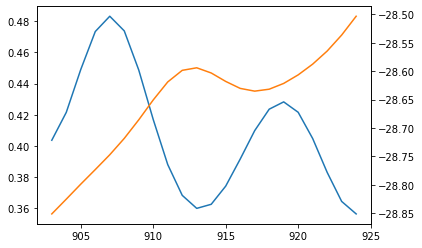

In [97]:
fig, ax = plt.subplots()
gi['s'].plot(ax=ax)
axt = ax.twinx()
gi['angle'].plot(ax=axt, c=tab10[1])

In [71]:
gi['']

,key,t0,t0_norm,ts,stroke_id,segment_id,x,y,p,x_,y_,p_,x0,y0,p0,x1,y1,s,angle
58,359444_570,359444,0.237718,570,21,8,0.467708,0.493548,0.016597,0.032846,-0.035474,0.007335,0.049375,-0.043597,0.006370,-0.003140,-0.000478,0.317630,0.813300
59,359457_580,359457,0.238039,580,21,8,0.461096,0.498603,0.017312,0.026234,-0.030419,0.008051,0.046211,-0.042873,0.006478,-0.003195,0.000016,0.319504,0.831447
60,359477_590,359477,0.238532,590,21,8,0.456355,0.502365,0.017855,0.021493,-0.026657,0.008594,0.043210,-0.041789,0.006643,-0.003167,0.000475,0.320262,0.839072
61,359477_600,359477,0.238532,600,21,8,0.454384,0.504044,0.018111,0.019523,-0.024979,0.008849,0.040366,-0.040403,0.006829,-0.003067,0.000876,0.319001,0.839072
62,359491_610,359491,0.238877,610,21,8,0.451478,0.506932,0.018442,0.016616,-0.022090,0.009180,0.037567,-0.038715,0.007028,-0.002946,0.001223,0.319000,0.850607
63,359511_620,359511,0.239371,620,21,8,0.447874,0.510843,0.018778,0.013012,-0.018179,0.009517,0.034625,-0.036679,0.007255,-0.002881,0.001546,0.327003,0.858140
64,359511_630,359511,0.239371,630,21,8,0.446418,0.513071,0.018494,0.011556,-0.015952,0.009233,0.031376,-0.034249,0.007533,-0.002941,0.001880,0.349044,0.858140
65,359527_640,359527,0.239765,640,21,8,0.444851,0.515614,0.018107,0.009989,-0.013409,0.008846,0.027768,-0.031428,0.007874,-0.003139,0.002241,0.385677,0.870884
66,359527_650,359527,0.239765,650,21,8,0.442292,0.520992,0.016793,0.007430,-0.008030,0.007532,0.023904,-0.028292,0.008266,-0.003418,0.002610,0.430053,0.870884
67,359541_660,359541,0.240110,660,21,8,0.439935,0.526919,0.015528,0.005074,-0.002104,0.006266,0.020010,-0.024973,0.008664,-0.003670,0.002937,0.470081,0.882694


In [68]:
wl=7
po=2
savgol_dict = {'window_length':wl, 'polyorder':po, 'mode':'nearest'}

In [69]:
alpha = np.arctan2(gi['y1'], gi['x1'])
da = scsig.savgol_filter(alpha, deriv=1, **savgol_dict)

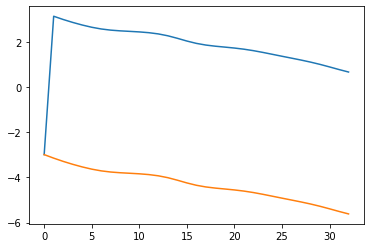

In [70]:
plt.plot(alpha.values)
plt.plot(np.unwrap(alpha))

In [58]:
alpha = alpha.values

# unwrap

The angle computed from atan2 is prone to phase wrapping. The function below is meant to emulate the behaviour of np.unwrap in a stream manner.
This is implemented in the MAX/MSP app in javascript.

In [59]:
def unwrap(x_arr):
    global last, acc
    last = 0
    acc = 0
    def unwrap_(x, period=np.pi):
        global last, acc
        # print(x, last, acc)
        diff = x+acc - last
        if np.abs(diff) > period:
            if diff < 0:
                acc += 2*period
            if diff > 0:
                acc -= 2*period
        x += acc
        last = x

        return x
    res = []
    for x in x_arr:
        res.append(unwrap_(x))
    
    return np.array(res)

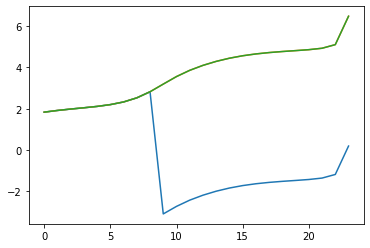

In [60]:
plt.plot(alpha)
plt.plot(np.unwrap(alpha))
plt.plot(unwrap(alpha))